# Question 2 - Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In [3]:
# used libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#from botocore.client import Config
#import ibm_boto3
import types
import pickle
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'seaborn'

In [2]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cred = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vrIc8QnWC1IZwl8dvxHkJAHSDpGvebHj_riEHcajRmpw',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')
# add missing __iter__ method, so pandas accepts body as file-like object
body = client_cred.get_object(Bucket='edx1-donotdelete-pr-8ocre25qb77t9y',Key='311_Service_Requests_from_2010_to_Present_min.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df = pd.read_csv(body)
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [3]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-da8f8ca5-9384-4472-ae6d-0cd70d59e76d',
    'IBM_API_KEY_ID': 'vrIc8QnWC1IZwl8dvxHkJAHSDpGvebHj_riEHcajRmpw',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'BUCKET': 'edx1-donotdelete-pr-8ocre25qb77t9y',
    'FILE': '311_Service_Requests_from_2010_to_Present_min.csv'
}
bucket = credentials_1['BUCKET']
bucket

'edx1-donotdelete-pr-8ocre25qb77t9y'

In [4]:
body = r"C:\CAPSTONE project\311_Service_Requests_from_2010_to_Present_min.csv"
df_1 = pd.read_csv(body, nrows=100, index_col=0)

# get data types from this small part
df_1_types = df_1.dtypes
df_1_names = df_1.columns
dict_types = dict(zip(df_1_names, df_1_types))
print (dict_types)

{'Unique Key': dtype('int64'), 'Created Date': dtype('O'), 'Closed Date': dtype('O'), 'Complaint Type': dtype('O'), 'Location Type': dtype('O'), 'Incident Zip': dtype('float64'), 'Incident Address': dtype('O'), 'Street Name': dtype('O'), 'Address Type': dtype('O'), 'City': dtype('O'), 'Status': dtype('O'), 'Resolution Description': dtype('O'), 'Borough': dtype('O'), 'Latitude': dtype('float64'), 'Longitude': dtype('float64')}


In [49]:
# Let`s limit needed columns for this notebook
df_2 = df_1.drop(['Unique Key', 'Created Date', 'Location Type', 'Address Type', 'City', 'Closed Date', 'Resolution Description', 'Latitude', 'Longitude'], axis=1)
df_2_types = df_2.dtypes
df_2_names = df_2.columns
cols_read=list(df_2_names)
dict_2_types = dict(zip(df_2_names, df_2_types))
print (cols_read)

['Complaint Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Status', 'Borough']


In [50]:
# now it consumes less memory
#df = pd.read_csv(body, usecols=cols_read, dtype=dict_2_types, nrows=3000000)
df = pd.read_csv(body, usecols=cols_read, dtype=dict_2_types)
df.head()

,Complaint Type,Incident Zip,Incident Address,Street Name,Status,Borough
0,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,WEST 52 STREET,Open,MANHATTAN
1,UNSANITARY CONDITION,11204.0,1751 67 STREET,67 STREET,Open,BROOKLYN
2,HEAT/HOT WATER,11372.0,87-15 37 AVENUE,37 AVENUE,Open,QUEENS
3,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,Open,BRONX
4,APPLIANCE,11209.0,223 78 STREET,78 STREET,Open,BROOKLYN


In [51]:
#what are the complaint types
df["Complaint Type"].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [52]:
#merge similar complaint types
df['Complaint Type'] = np.where(df['Complaint Type'] == 'HEATING', 'HEAT/HOT WATER', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'Electric', 'ELECTRIC', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'PAINT - PLASTER', 'PAINT/PLASTER', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'Appliance', 'APPLIANCE', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'General', 'GENERAL', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'Safety', 'SAFETY', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'Unsanitary Condition', 'UNSANITARY CONDITION', df['Complaint Type'])
df['Complaint Type'] = np.where(df['Complaint Type'] == 'Plumbing', 'PLUMBING', df['Complaint Type'])
df["Complaint Type"].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'HPD Literature Request', 'GENERAL CONSTRUCTION', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT',
       'Outside Building', 'Mold'], dtype=object)

HEAT/HOT WATER            2149424
PLUMBING                   711141
PAINT/PLASTER              707695
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       457142
ELECTRIC                   307311
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    152471
FLOORING/STAIRS            137402
APPLIANCE                  112835
HPD Literature Request      52824
SAFETY                      51953
OUTSIDE BUILDING             7142
ELEVATOR                     6725
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Mold                            1
Name: Complaint Type, dtype: int64


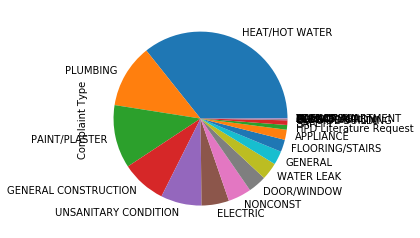

In [53]:
#complaint type counts 
print (df["Complaint Type"].value_counts())
df["Complaint Type"].value_counts().plot.pie()

### Quiz 1 - Can you determine the age of the building from the PLUTO dataset?

BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
Unspecified      282917
QUEENS           244122
STATEN ISLAND     18368
Name: Borough, dtype: int64


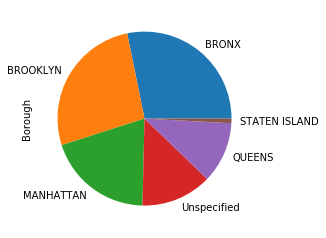

In [54]:
# Let`s check which borough has the highest number of HEAT/HOT WATER complaint.
df_heat = df.loc[df['Complaint Type'] == 'HEAT/HOT WATER']
# also let`s limit our df to boroughs, ZIP codes, street data and check
df_location = df_heat.copy()
df_location = df_location[['Street Name', 'Borough','Incident Zip']]
# And check which borough has the most of compalints
print (df_location['Borough'].value_counts())
df_location['Borough'].value_counts().plot.pie()

In [55]:
# Big amount of lines has the 'Borough' column unspecified. We need to find boroughs using 'Street Name' or 'Incident Zip'.
# Let`s check which column to choose street or Zip values.
print("nan Street Name =", df_heat['Street Name'].isna().sum())
print("nan Incident Zip =", df_heat['Incident Zip'].isna().sum())
print("nan Incident Address =", df_heat['Incident Address'].isna().sum())

nan Street Name = 1
nan Incident Zip = 19024
nan Incident Address = 1


In [56]:
# Since 'Street Name' has less has less NaN values, let`s create a dictionary with 'Street Name' as key and 'Borough' as item. 
# First we set 'Street Name' set as index.
df_location.set_index('Street Name',inplace=True)
df_location.head()

,Borough,Incident Zip
Street Name,,
WEST 52 STREET,MANHATTAN,10019.0
37 AVENUE,QUEENS,11372.0
SOUTHERN BOULEVARD,BRONX,10458.0
MORRIS AVENUE,BRONX,10456.0
81 STREET,QUEENS,11372.0


In [57]:
# And make dictionary for every street
street_dict = df_location['Borough'].to_dict()
street_dict

{'WEST   52 STREET': 'MANHATTAN',
 '37 AVENUE': 'QUEENS',
 'SOUTHERN BOULEVARD': 'BRONX',
 'MORRIS AVENUE': 'BRONX',
 '81 STREET': 'QUEENS',
 'WYONA STREET': 'BROOKLYN',
 'ALDUS STREET': 'BRONX',
 'FREDERICK DOUGLASS BOULEVARD': 'MANHATTAN',
 'LENOX ROAD': 'BROOKLYN',
 'WEST   22 STREET': 'BROOKLYN',
 'CENTRAL PARK NORTH': 'MANHATTAN',
 'WEST  151 STREET': 'MANHATTAN',
 'BOYNTON AVENUE': 'BRONX',
 '64 STREET': 'BROOKLYN',
 'FLATBUSH AVENUE': 'BROOKLYN',
 'WEST  213 STREET': 'MANHATTAN',
 'ST JOHNS PLACE': 'BROOKLYN',
 'EAST   37 STREET': 'BROOKLYN',
 'KINGSBRIDGE TERRACE': 'BRONX',
 'BRONXDALE AVENUE': 'BRONX',
 'AVENUE K': 'BROOKLYN',
 'TIEBOUT AVENUE': 'BRONX',
 'WEST  231 STREET': 'BRONX',
 'EAST  179 STREET': 'BRONX',
 'WASHINGTON AVENUE': 'BRONX',
 'WEST  136 STREET': 'MANHATTAN',
 'SENECA AVENUE': 'BRONX',
 '43 STREET': 'BROOKLYN',
 'ELMHURST AVENUE': 'QUEENS',
 'HEATH AVENUE': 'BRONX',
 'WEST  114 STREET': 'MANHATTAN',
 'EAST   52 STREET': 'BROOKLYN',
 '49 STREET': 'BROOKLYN',
 

### Quiz 2 - Which of the following methodologies can you use to identify whether any relationship exist between the building characteristics and the number of complaints?

### Quiz 3 - The cardinality of the data in PLUTO dataset is at the same level as the complaint dataset?